In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Data and notebook/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 11)

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Exploratory Data Analysis

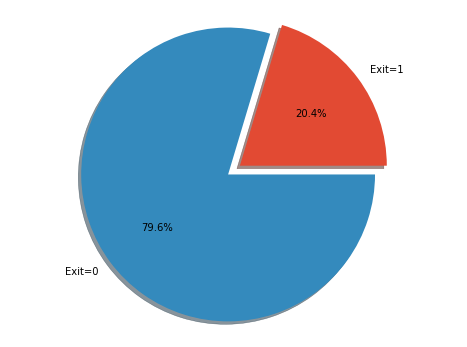

In [10]:
label = 'Exit=1', 'Exit=0'
size = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

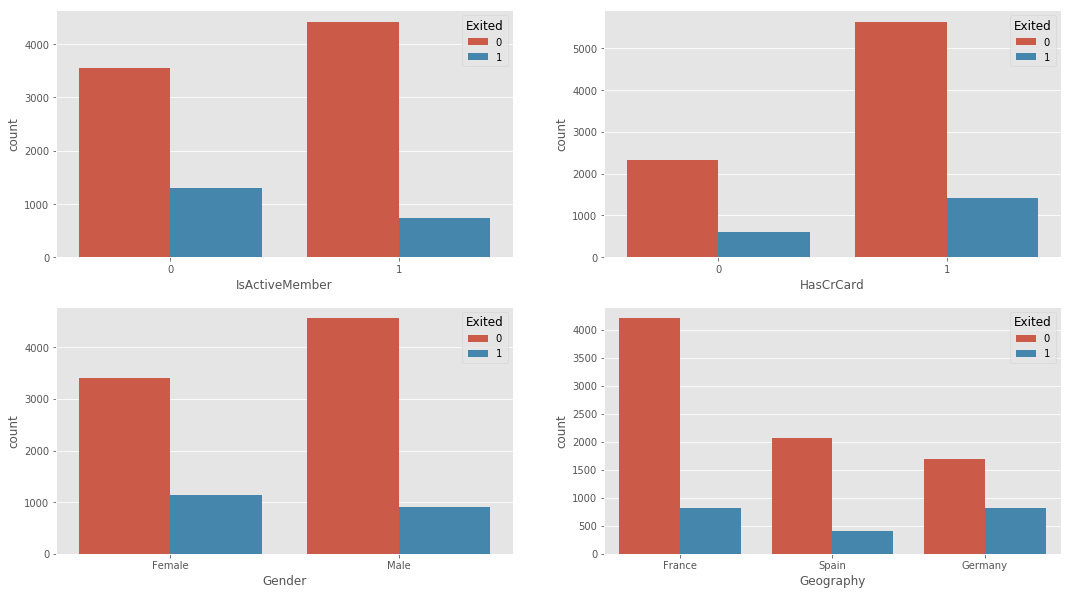

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[0][0])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[0][1])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[1][0])
sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[1][1])

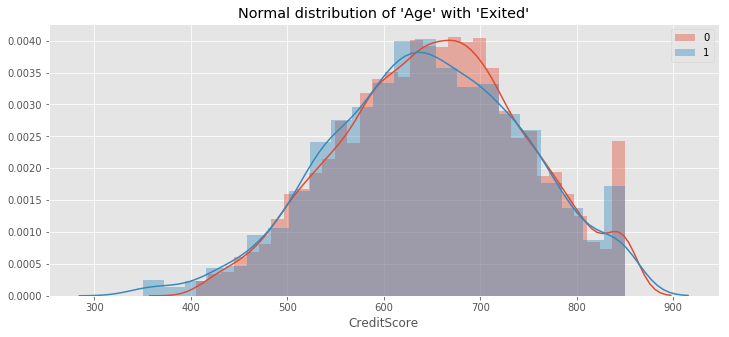

Red Line mean and std resp.:-  651.8531960316463 and 95.65383704715626
Blue Line mean and std resp.:-  645.3514972999509 and 100.32150264961567


In [12]:
plt.figure(figsize=(12,5))
sns.distplot(df["CreditScore"][df["Exited"]==0])
sns.distplot(df["CreditScore"][df["Exited"]==1])
plt.legend(['0','1'])
plt.title("Normal distribution of 'Age' with 'Exited'")
plt.show()
print('Red Line mean and std resp.:- ', df["CreditScore"][df["Exited"]==0].mean(), "and", df["CreditScore"][df["Exited"]==0].std())
print('Blue Line mean and std resp.:- ', df["CreditScore"][df["Exited"]==1].mean(), "and", df["CreditScore"][df["Exited"]==1].std())

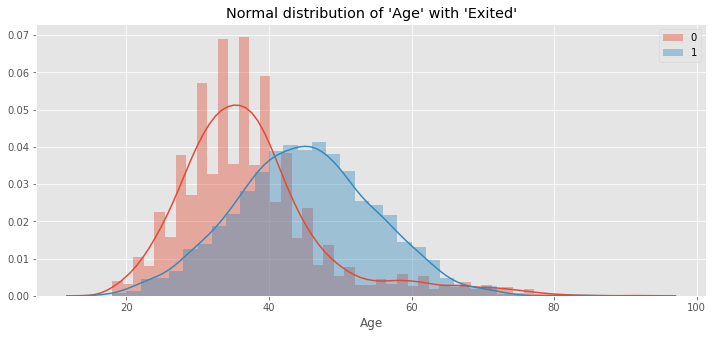

Red Line mean and std resp.:-  37.40838879819164 and 10.125362911047631
Blue Line mean and std resp.:-  44.8379970544919 and 9.761561555507132


In [13]:
plt.figure(figsize=(12,5))
sns.distplot(df["Age"][df["Exited"]==0])
sns.distplot(df["Age"][df["Exited"]==1])
plt.legend(['0','1'])
plt.title("Normal distribution of 'Age' with 'Exited'")
plt.show()
print('Red Line mean and std resp.:- ', df["Age"][df["Exited"]==0].mean(), "and", df["Age"][df["Exited"]==0].std())
print('Blue Line mean and std resp.:- ', df["Age"][df["Exited"]==1].mean(), "and", df["Age"][df["Exited"]==1].std())

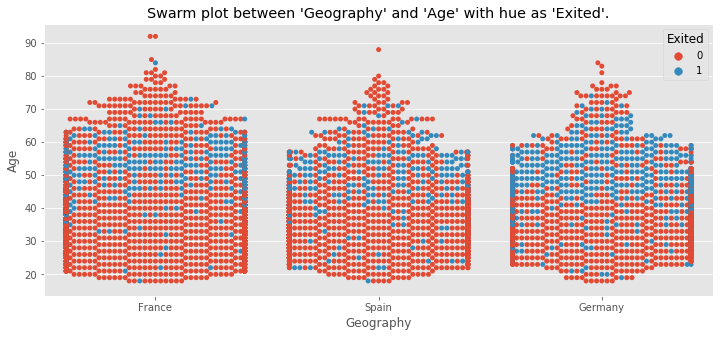

In [14]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="Geography", y="Age", hue="Exited", data=df)
plt.title('Swarm plot between \'Geography\' and \'Age\' with hue as \'Exited\'.')
plt.show()

In [14]:
cor = df.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

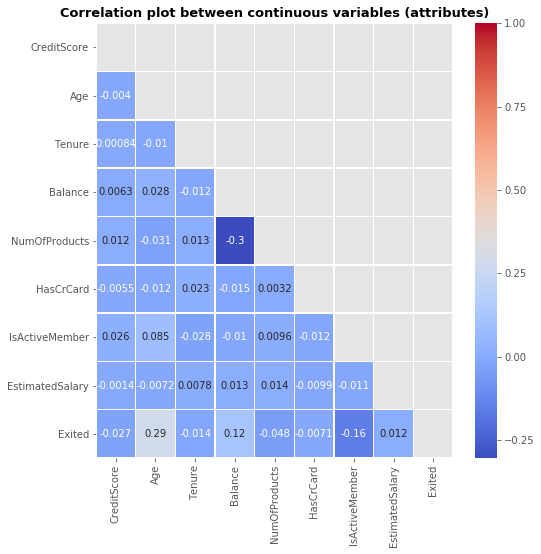

In [15]:
plt.figure(figsize=(8, 8))
sns.axes_style("white")
sns.heatmap(cor, annot=True, cmap="coolwarm", mask = mask, linewidths=.5)
plt.title('Correlation plot between continuous variables (attributes)', size=13, fontweight='bold')
plt.show()

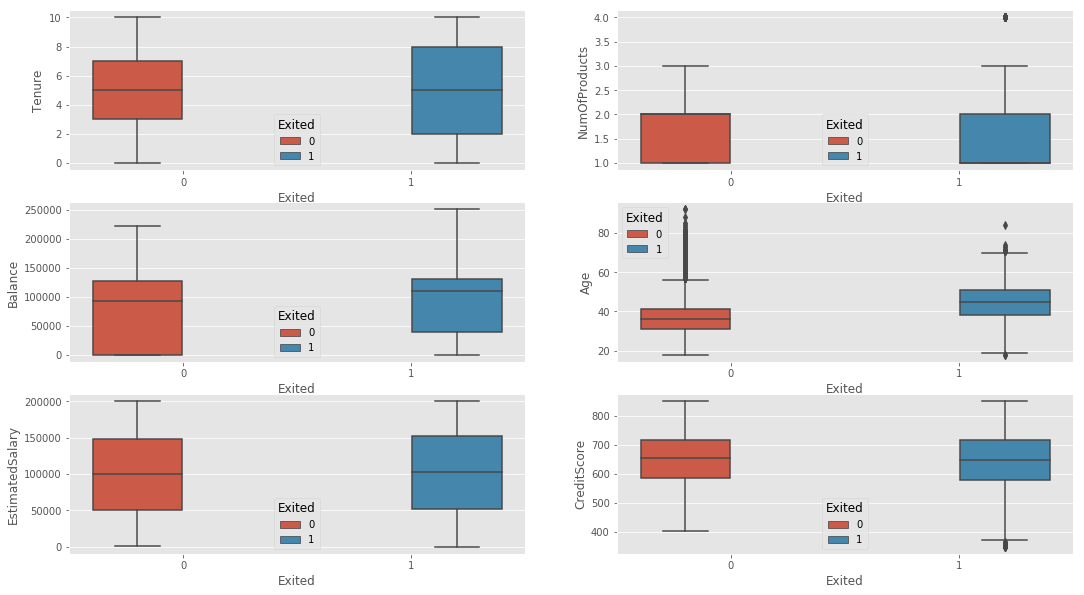

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(18, 10))
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=ax[0][0])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df , ax=ax[0][1])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=ax[1][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=ax[1][1])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=ax[2][0])
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=ax[2][1])
plt.style.use('ggplot')
plt.show()

# Feature Engineering

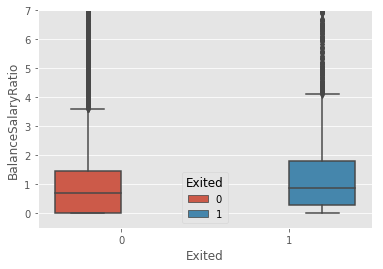

In [17]:
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df)
plt.ylim(-0.5, 7)
plt.show()

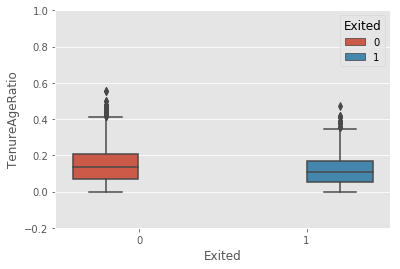

In [20]:
df['TenureAgeRatio'] = df['Tenure'] / df['Age']
sns.boxplot(y='TenureAgeRatio', x='Exited', hue='Exited', data=df)
plt.ylim(-0.2, 1)
plt.show()

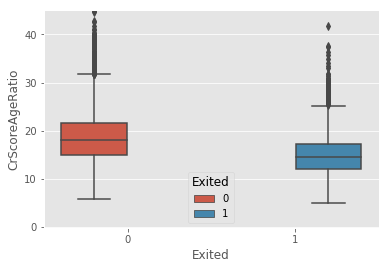

In [22]:
df['CrScoreAgeRatio'] = df['CreditScore'] / df['Age']
sns.boxplot(y='CrScoreAgeRatio', x='Exited', hue='Exited', data=df)
plt.ylim(-0.2, 45)
plt.show()

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureAgeRatio,CrScoreAgeRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [24]:
cont_vars = list(df.select_dtypes(exclude=object).columns)    # Continuous Variables in Data
categ_vars =  list(df.select_dtypes(include=object).columns)     # Categorical variables in Data
print('Continuous Variables = ', cont_vars, end='\n\n')
print('Categorical Variables = ',categ_vars)

Continuous Variables =  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'BalanceSalaryRatio', 'TenureAgeRatio', 'CrScoreAgeRatio']

Categorical Variables =  ['Geography', 'Gender']


Converting `categ_vars` into `one_hot_vector`

In [25]:
for i in categ_vars:
    if df[i].dtype==np.object:
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i]==j, 1, 0)
            
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureAgeRatio,CrScoreAgeRatio,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0,1,0,1,0


In [26]:
df.drop(categ_vars, axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureAgeRatio,CrScoreAgeRatio,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0,1,0,1,0


In [27]:
df.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
BalanceSalaryRatio    float64
TenureAgeRatio        float64
CrScoreAgeRatio       float64
Geography_France        int64
Geography_Spain         int64
Geography_Germany       int64
Gender_Female           int64
Gender_Male             int64
dtype: object

In [28]:
df.shape

(10000, 17)

In [29]:
rem_list = ['HasCrCard', 'IsActiveMember', 'Exited']
scale_vars = list()
for i in cont_vars:
    if i in rem_list:
        continue
    scale_vars.append(i)
    
print(scale_vars)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureAgeRatio', 'CrScoreAgeRatio']


Scaling the **Continuous Variables** in the data.

In [30]:
min_value = df[scale_vars].min().copy()
max_value = df[scale_vars].max().copy()
df[scale_vars] = (df[scale_vars] - min_value) / (max_value - min_value)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureAgeRatio,CrScoreAgeRatio,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.085714,0.235083,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.000070,0.043902,0.237252,0,1,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0.000132,0.342857,0.168807,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.046154,0.310859,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.000150,0.083721,0.354739,0,1,0,1,0


In [31]:
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)

In [32]:
print(df_train.shape)
print(df_test.shape)

(8000, 17)
(2000, 17)


In [33]:
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureAgeRatio,CrScoreAgeRatio,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
8291,0.636,0.270270,0.1,0.589500,0.000000,1,1,0.346825,0,0.000201,0.047368,0.302671,0,1,0,0,1
3238,0.650,0.486486,0.6,0.000000,0.000000,1,0,0.551364,1,0.000000,0.200000,0.181835,1,0,0,0,1
4239,0.572,0.283784,0.3,0.471650,0.000000,1,0,0.923489,0,0.000060,0.138462,0.272426,1,0,0,1,0
4490,0.594,0.621622,0.1,0.363558,0.000000,1,1,0.208963,0,0.000206,0.028125,0.124959,0,1,0,1,0
5571,0.668,0.270270,0.3,0.534753,0.666667,1,0,0.019776,1,0.003187,0.142105,0.312689,0,1,0,1,0


In [34]:
df_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureAgeRatio,CrScoreAgeRatio,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
6,0.944,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0,0.000000,0.252000,0.275574,1,0,0,0,1
11,0.294,0.081081,0.3,0.000000,0.333333,1,0,0.381929,0,0.000000,0.225000,0.377124,0,1,0,0,1
19,0.752,0.081081,0.6,0.000000,0.333333,1,1,0.273588,0,0.000000,0.450000,0.604135,1,0,0,1,0
22,0.320,0.270270,0.4,0.000000,0.000000,1,0,0.594567,1,0.000000,0.189474,0.203749,0,1,0,1,0
26,0.812,0.243243,0.2,0.545304,0.000000,1,1,0.850233,0,0.000076,0.100000,0.384063,0,0,1,0,1


# Model Fitting

In [38]:
param_dict = {'C':[0.1,10,50], 'max_iter':[300,500], 'fit_intercept':[True], 'class_weight':['balanced',None], 'intercept_scaling':[1], 'penalty':['l2'], 'tol':[0.0001,0.000001]}
poly = PolynomialFeatures(degree=2)
df_train_poly = poly.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_dict, cv=5, refit=True, verbose=0)
log_pol2_grid.fit(df_train_poly, df_train['Exited'])

print(log_pol2_grid.best_score_)    
print(log_pol2_grid.best_params_)
print(log_pol2_grid.best_estimator_)

0.859
{'C': 10, 'class_weight': None, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [35]:
param_dict = {'max_depth':[3,5,6,7,8], 'max_features':[2,4,6,7,8,9], 'n_estimators':[50,100], 'class_weight':['balanced',None], 'min_samples_split':[3,5,6,7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_dict, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train['Exited'])

print(RanFor_grid.best_score_)    
print(RanFor_grid.best_params_)
print(RanFor_grid.best_estimator_)

0.8665
{'class_weight': None, 'max_depth': 8, 'max_features': 7, 'min_samples_split': 6, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [35]:
param_dict = {'max_depth':[5,6,7,8], 'gamma':[0.01,0.001,0.001], 'min_child_weight':[1,5,10], 'learning_rate':[0.05,0.1,0.2,0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_dict, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train['Exited'])

print(xgb_grid.best_score_)    
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)

0.86575
{'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.01,
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


### Logistic Regression Model

In [39]:
lr = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

lr.fit(df_train_poly, df_train['Exited'])
print(classification_report(df_train.Exited,  lr.predict(df_train_poly)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6402
           1       0.76      0.47      0.58      1598

   micro avg       0.86      0.86      0.86      8000
   macro avg       0.82      0.72      0.75      8000
weighted avg       0.86      0.86      0.85      8000



### Random Forest Classifier

In [36]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train['Exited'])
print(classification_report(df_train.Exited,  rf.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6402
           1       0.88      0.52      0.65      1598

   micro avg       0.89      0.89      0.89      8000
   macro avg       0.88      0.75      0.79      8000
weighted avg       0.89      0.89      0.88      8000



### XGBooster Classifier

In [40]:
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.01,
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgbc.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train['Exited'])
print(classification_report(df_train.Exited,  xgbc.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6402
           1       0.86      0.53      0.65      1598

   micro avg       0.89      0.89      0.89      8000
   macro avg       0.87      0.75      0.79      8000
weighted avg       0.89      0.89      0.88      8000



In [41]:
X = df_train.drop(['Exited'], axis=1)
y = df_train.Exited

Defining **AUC_SCORE** and **ROC_CURVE** of the models

In [42]:
auc_score_lr = roc_auc_score(y, lr.predict(df_train_poly))
fpr_lr, tpr_lr, _ = roc_curve(y, lr.predict_proba(df_train_poly)[:,1])

In [43]:
auc_score_rf = roc_auc_score(y, rf.predict(X))
fpr_rf, tpr_rf, _ = roc_curve(y, rf.predict_proba(X)[:,1])

In [44]:
auc_score_xgb = roc_auc_score(y, xgbc.predict(X))
fpr_xgb, tpr_xgb, _ = roc_curve(y, xgbc.predict_proba(X)[:,1])

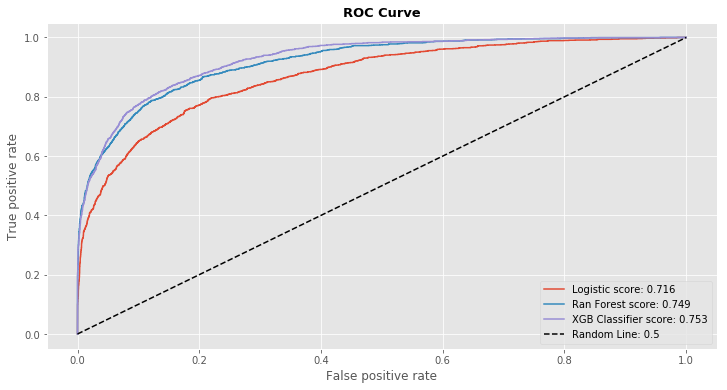

In [45]:
plt.figure(figsize = (12,6))
plt.plot(fpr_lr, tpr_lr, label = 'Logistic score: ' + str(round(auc_score_lr, 3)))
plt.plot(fpr_rf, tpr_rf, label = 'Ran Forest score: ' + str(round(auc_score_rf, 3)))
plt.plot(fpr_xgb, tpr_xgb, label = 'XGB Classifier score: ' + str(round(auc_score_xgb, 3)))
plt.plot([0,1], [0,1], 'k--', label = 'Random Line: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve', size=13, fontweight='bold')
plt.legend(loc='best')
plt.show()